In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Install CLIP and required libraries
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git
!pip install scipy opencv-python moviepy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.0 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-ck1lygd8
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-ck1lygd8
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import os

folder_path = "/content/drive/MyDrive/ydata-tvsum50-v1_1"
print("Files in dataset folder:")
print(os.listdir(folder_path))


Files in dataset folder:
['README', 'ydata-tvsum50-video', 'ydata-tvsum50-data', 'ydata-tvsum50-thumbnail', 'ydata-tvsum50-matlab']


In [ ]:
video_folder_path = "/content/drive/MyDrive/ydata-tvsum50-v1_1/ydata-tvsum50-video"
video_files = os.listdir(video_folder_path)

# Show the video files
print("Video files found:", video_files)


Video files found: ['video']


In [ ]:
video_subfolder_path = "/content/drive/MyDrive/ydata-tvsum50-v1_1/ydata-tvsum50-video/video"
video_files_in_subfolder = os.listdir(video_subfolder_path)

# Show the video files inside the subfolder
print("Video files inside 'video' folder:", video_files_in_subfolder)


Video files inside 'video' folder: ['-esJrBWj2d8.mp4', '0tmA_C6XwfM.mp4', '37rzWOQsNIw.mp4', '3eYKfiOEJNs.mp4', '4wU_LUjG5Ic.mp4', '91IHQYk1IQM.mp4', '98MoyGZKHXc.mp4', 'AwmHb44_ouw.mp4', 'Bhxk-O1Y7Ho.mp4', 'E11zDS9XGzg.mp4', 'EE-bNr36nyA.mp4', 'EYqVtI9YWJA.mp4', 'GsAD1KT1xo8.mp4', 'HT5vyqe0Xaw.mp4', 'Hl-__g2gn_A.mp4', 'J0nA4VgnoCo.mp4', 'JKpqYvAdIsw.mp4', 'JgHubY5Vw3Y.mp4', 'LRw_obCPUt0.mp4', 'NyBmCxDoHJU.mp4', 'PJrm840pAUI.mp4', 'RBCABdttQmI.mp4', 'Se3oxnaPsz0.mp4', 'VuWGsYPqAX8.mp4', 'WG0MBPpPC6I.mp4', 'WxtbjNsCQ8A.mp4', 'XkqCExn6_Us.mp4', 'XzYM3PfTM4w.mp4', 'Yi4Ij2NM7U4.mp4', 'akI8YFjEmUw.mp4', 'b626MiF1ew4.mp4', 'byxOvuiIJV0.mp4', 'cjibtmSLxQ4.mp4', 'eQu1rNs0an0.mp4', 'fWutDQy1nnY.mp4', 'gzDbaEs1Rlg.mp4', 'i3wAGJaaktw.mp4', 'iVt07TCkFM0.mp4', 'kLxoNp-UchI.mp4', 'oDXZc0tZe04.mp4', 'qqR6AEXwxoQ.mp4', 'sTEELN-vY30.mp4', 'uGu_10sucQo.mp4', 'vdmoEJ5YbrQ.mp4', 'xmEERLqJ2kU.mp4', 'xwqBXPGE9pQ.mp4', 'xxdtq8mxegs.mp4', 'z_6gVvQb2d0.mp4', 'jcoYJXDG9sw.mp4', '_xMr-HKMfVA.mp4']


In [ ]:
import os
from moviepy.editor import VideoFileClip

# Set the video folder path
video_folder = "/content/drive/MyDrive/ydata-tvsum50-v1_1/ydata-tvsum50-video/video"
output_frame_folder = "/content/drive/MyDrive/ydata-tvsum50-v1_1/frames"

# Create output folder for frames if it doesn't exist
if not os.path.exists(output_frame_folder):
    os.makedirs(output_frame_folder)

# Extract frames from each video
for video_file in os.listdir(video_folder):
    if video_file.endswith('.mp4'):
        video_path = os.path.join(video_folder, video_file)
        video_clip = VideoFileClip(video_path)

        # Create a subfolder for frames of this video
        video_frame_folder = os.path.join(output_frame_folder, video_file.replace(".mp4", ""))
        if not os.path.exists(video_frame_folder):
            os.makedirs(video_frame_folder)

        # Extract 1 frame per second (fps)
        for t in range(0, int(video_clip.duration), 1):  # 1 fps
            frame = video_clip.get_frame(t)
            frame_filename = os.path.join(video_frame_folder, f"frame_{t}.jpg")
            video_clip.save_frame(frame_filename, t)

        print(f"Frames extracted for {video_file}")

print("Frame extraction complete!")


  if event.key is 'enter':



Frames extracted for -esJrBWj2d8.mp4
Frames extracted for 0tmA_C6XwfM.mp4
Frames extracted for 37rzWOQsNIw.mp4
Frames extracted for 3eYKfiOEJNs.mp4
Frames extracted for 4wU_LUjG5Ic.mp4
Frames extracted for 91IHQYk1IQM.mp4
Frames extracted for 98MoyGZKHXc.mp4
Frames extracted for AwmHb44_ouw.mp4
Frames extracted for Bhxk-O1Y7Ho.mp4
Frames extracted for E11zDS9XGzg.mp4
Frames extracted for EE-bNr36nyA.mp4
Frames extracted for EYqVtI9YWJA.mp4
Frames extracted for GsAD1KT1xo8.mp4
Frames extracted for HT5vyqe0Xaw.mp4
Frames extracted for Hl-__g2gn_A.mp4
Frames extracted for J0nA4VgnoCo.mp4
Frames extracted for JKpqYvAdIsw.mp4
Frames extracted for JgHubY5Vw3Y.mp4
Frames extracted for LRw_obCPUt0.mp4
Frames extracted for NyBmCxDoHJU.mp4
Frames extracted for PJrm840pAUI.mp4
Frames extracted for RBCABdttQmI.mp4
Frames extracted for Se3oxnaPsz0.mp4
Frames extracted for VuWGsYPqAX8.mp4
Frames extracted for WG0MBPpPC6I.mp4
Frames extracted for WxtbjNsCQ8A.mp4
Frames extracted for XkqCExn6_Us.mp4
F

In [ ]:
import torch
from torchvision import models, transforms
from PIL import Image
import os

# Load ResNet18 model pre-trained on ImageNet
model = models.resnet18(pretrained=True)
model.eval()

# Define image transformations (resize and normalize)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Function to extract features from an image
def extract_features(image_path):
    img = Image.open(image_path)
    img = transform(img).unsqueeze(0)  # Add batch dimension
    with torch.no_grad():  # No need to compute gradients
        features = model(img)
    return features

# Iterate over the extracted frames and get features
frame_features = {}
for video_folder_name in os.listdir(output_frame_folder):
    video_folder_path = os.path.join(output_frame_folder, video_folder_name)
    if os.path.isdir(video_folder_path):
        for frame_file in os.listdir(video_folder_path):
            if frame_file.endswith('.jpg'):
                frame_path = os.path.join(video_folder_path, frame_file)
                features = extract_features(frame_path)
                frame_features[frame_path] = features

print("Feature extraction complete!")


  warnings.warn(

  warnings.warn(msg)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 60.3MB/s]


KeyboardInterrupt: 

In [ ]:
import clip
import torch

# Load the CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# Text prompt for summarization
text = ["Summary of the video"]  # Replace with relevant text for summarization

# Tokenize and encode the text
text_input = clip.tokenize(text).to(device)
with torch.no_grad():
    text_features = model.encode_text(text_input)

print("Text embedding generated!")


Text embedding generated!


In [ ]:
print(list(frame_features.keys())[:5])  # Print first few keys
print(frame_path)  # See if it exists in the keys


['/content/drive/MyDrive/ydata-tvsum50-v1_1/frames/-esJrBWj2d8/frame_0.jpg', '/content/drive/MyDrive/ydata-tvsum50-v1_1/frames/-esJrBWj2d8/frame_1.jpg', '/content/drive/MyDrive/ydata-tvsum50-v1_1/frames/-esJrBWj2d8/frame_2.jpg', '/content/drive/MyDrive/ydata-tvsum50-v1_1/frames/-esJrBWj2d8/frame_3.jpg', '/content/drive/MyDrive/ydata-tvsum50-v1_1/frames/-esJrBWj2d8/frame_4.jpg']
/content/drive/MyDrive/ydata-tvsum50-v1_1/frames/fWutDQy1nnY/frame_6.jpg


In [ ]:
import os
import torch
from PIL import Image
from torchvision import models, transforms

# Feature extractor setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = models.resnet18(pretrained=True)
model = model.eval().to(device)

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

def extract_features(image_path):
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        features = model(image)
    return features.squeeze(0)

# Rebuild dictionary for ALL videos
frame_features = {}
frame_root = "/content/drive/MyDrive/ydata-tvsum50-v1_1/frames"

for video_dir in os.listdir(frame_root):
    video_path = os.path.join(frame_root, video_dir)
    if os.path.isdir(video_path):
        for frame in sorted(os.listdir(video_path)):
            if frame.endswith('.jpg'):
                frame_path = os.path.join(video_path, frame)
                try:
                    features = extract_features(frame_path)
                    frame_features[frame_path] = features
                except Exception as e:
                    print(f"Error with {frame_path}: {e}")


KeyboardInterrupt: 

In [ ]:
import torch
import os
from PIL import Image
from torchvision import models, transforms
from tqdm import tqdm

# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load pretrained model (ResNet18 for simplicity)
model = models.resnet18(pretrained=True)
model = model.eval().to(device)

# Feature transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Frame root directory
frame_root = "/content/drive/MyDrive/ydata-tvsum50-v1_1/frames"

# Dictionary to hold frame features
frame_features = {}

# Iterate over videos
for video_folder in tqdm(os.listdir(frame_root), desc="Extracting features from all videos"):
    video_path = os.path.join(frame_root, video_folder)
    if os.path.isdir(video_path):
        for frame_file in sorted(os.listdir(video_path)):
            if frame_file.endswith(".jpg"):
                frame_path = os.path.join(video_path, frame_file)
                try:
                    image = Image.open(frame_path).convert("RGB")
                    image = transform(image).unsqueeze(0).to(device)
                    with torch.no_grad():
                        feature = model(image).squeeze(0).cpu()
                    frame_features[frame_path] = feature
                except Exception as e:
                    print(f"Failed on {frame_path}: {e}")

print(f"Extracted features for {len(frame_features)} frames.")


Extracting features from all videos: 100%|██████████| 50/50 [25:10<00:00, 30.22s/it]

Extracted features for 12558 frames.


In [ ]:
import pickle

with open("/content/drive/MyDrive/ydata-tvsum50-v1_1/frame_features.pkl", "wb") as f:
    pickle.dump(frame_features, f)

print("Saved all frame features!")


Saved all frame features!


In [ ]:
import clip
import torch
from PIL import Image
import os
from tqdm import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# Path to frames
frame_root = "/content/drive/MyDrive/ydata-tvsum50-v1_1/frames"

# Store CLIP image features
frame_features_clip = {}

for video_folder in tqdm(os.listdir(frame_root), desc="Extracting CLIP features"):
    video_path = os.path.join(frame_root, video_folder)
    if os.path.isdir(video_path):
        for frame_file in sorted(os.listdir(video_path)):
            if frame_file.endswith(".jpg"):
                frame_path = os.path.join(video_path, frame_file)
                try:
                    image = preprocess(Image.open(frame_path)).unsqueeze(0).to(device)
                    with torch.no_grad():
                        image_features = model.encode_image(image).squeeze(0).cpu()
                    frame_features_clip[frame_path] = image_features
                except Exception as e:
                    print(f"Failed on {frame_path}: {e}")


Extracting CLIP features: 100%|██████████| 50/50 [57:07<00:00, 68.56s/it]


In [ ]:
import torch

# Save to a file
save_path = "/content/frame_features_clip.pt"
torch.save(frame_features_clip, save_path)
print(f"Saved features to {save_path}")


Saved features to /content/frame_features_clip.pt


In [ ]:
import torch.nn.functional as F

# Example prompt
prompt = "a beautiful landscape"  # you can make this more domain-specific
text_tokens = clip.tokenize([prompt]).to(device)

# Encode prompt
with torch.no_grad():
    text_features = model.encode_text(text_tokens).squeeze(0).cpu()

# Compute similarity
frame_scores = {}
for frame_path, image_feat in frame_features_clip.items():
    sim = F.cosine_similarity(image_feat.unsqueeze(0), text_features.unsqueeze(0)).item()
    frame_scores[frame_path] = sim


In [ ]:
import numpy as np
from collections import defaultdict

# Group scores by video
video_scores = defaultdict(list)
for frame_path, score in frame_scores.items():
    video_id = os.path.basename(os.path.dirname(frame_path))
    video_scores[video_id].append((frame_path, score))

# Sort and apply smoothing
smoothed_scores = {}
for video_id, frames in video_scores.items():
    frames.sort()  # ensure frame_0, frame_1, ...
    scores = np.array([score for _, score in frames])
    smooth = np.convolve(scores, np.ones(5)/5, mode='same')  # 5-frame window
    for (frame_path, _), s in zip(frames, smooth):
        smoothed_scores[frame_path] = s


In [ ]:
summary_frames = defaultdict(list)

for frame_path, score in smoothed_scores.items():
    video_id = os.path.basename(os.path.dirname(frame_path))
    summary_frames[video_id].append((frame_path, score))

# Top-k per video (e.g., top 15%)
top_k_percent = 0.15
final_summary_frames = {}

for video_id, frames in summary_frames.items():
    frames.sort(key=lambda x: x[1], reverse=True)
    top_k = int(len(frames) * top_k_percent)
    final_summary_frames[video_id] = [f[0] for f in frames[:top_k]]


In [ ]:
import cv2

# Output summary video path
output_dir = "/content/drive/MyDrive/ydata-tvsum50-v1_1/summaries"
os.makedirs(output_dir, exist_ok=True)

for video_id, frame_paths in final_summary_frames.items():
    frame_paths.sort()  # Ensure chronological order

    height, width, _ = cv2.imread(frame_paths[0]).shape
    out_path = os.path.join(output_dir, f"{video_id}_summary.mp4")
    out = cv2.VideoWriter(out_path, cv2.VideoWriter_fourcc(*'mp4v'), 1, (width, height))

    for frame_path in frame_paths:
        frame = cv2.imread(frame_path)
        out.write(frame)

    out.release()
    print(f"Saved summary video: {out_path}")


Saved summary video: /content/drive/MyDrive/ydata-tvsum50-v1_1/summaries/-esJrBWj2d8_summary.mp4
Saved summary video: /content/drive/MyDrive/ydata-tvsum50-v1_1/summaries/0tmA_C6XwfM_summary.mp4
Saved summary video: /content/drive/MyDrive/ydata-tvsum50-v1_1/summaries/37rzWOQsNIw_summary.mp4
Saved summary video: /content/drive/MyDrive/ydata-tvsum50-v1_1/summaries/3eYKfiOEJNs_summary.mp4
Saved summary video: /content/drive/MyDrive/ydata-tvsum50-v1_1/summaries/4wU_LUjG5Ic_summary.mp4
Saved summary video: /content/drive/MyDrive/ydata-tvsum50-v1_1/summaries/91IHQYk1IQM_summary.mp4
Saved summary video: /content/drive/MyDrive/ydata-tvsum50-v1_1/summaries/98MoyGZKHXc_summary.mp4
Saved summary video: /content/drive/MyDrive/ydata-tvsum50-v1_1/summaries/AwmHb44_ouw_summary.mp4
Saved summary video: /content/drive/MyDrive/ydata-tvsum50-v1_1/summaries/Bhxk-O1Y7Ho_summary.mp4
Saved summary video: /content/drive/MyDrive/ydata-tvsum50-v1_1/summaries/E11zDS9XGzg_summary.mp4
Saved summary video: /content/

In [ ]:
import clip
import torch
from PIL import Image
import os
from tqdm import tqdm
from collections import defaultdict
import numpy as np
import cv2

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# 👇 SELECT the video you want to summarize
selected_video_id = "Yi4Ij2NM7U4"
frame_folder = f"/content/drive/MyDrive/ydata-tvsum50-v1_1/frames/Yi4Ij2NM7U4"

# 👇 CUSTOM PROMPT
text_prompt = "show only what he cooks"
text_token = clip.tokenize([text_prompt]).to(device)
with torch.no_grad():
    text_features = model.encode_text(text_token).squeeze(0).cpu()

# Store frame scores
frame_scores = {}

# Extract frame features and similarity
for frame_file in sorted(os.listdir(frame_folder)):
    if frame_file.endswith(".jpg"):
        frame_path = os.path.join(frame_folder, frame_file)
        try:
            image = preprocess(Image.open(frame_path)).unsqueeze(0).to(device)
            with torch.no_grad():
                image_features = model.encode_image(image).squeeze(0).cpu()
            similarity = torch.nn.functional.cosine_similarity(image_features, text_features, dim=0)
            frame_scores[frame_path] = similarity.item()
        except Exception as e:
            print(f"Error on {frame_path}: {e}")

# Smooth scores (moving average)
sorted_paths = sorted(frame_scores.keys())
scores = np.array([frame_scores[p] for p in sorted_paths])
smooth_scores = np.convolve(scores, np.ones(5)/5, mode='same')

# Select top 15% frames
top_k = int(len(smooth_scores) * 0.15)
top_indices = np.argsort(smooth_scores)[-top_k:]
selected_frames = [sorted_paths[i] for i in sorted(top_indices)]

# Save summary video
summary_path = f"/content/{selected_video_id}_{text_prompt.replace(' ', '_')}_summary.mp4"
frame_example = cv2.imread(selected_frames[0])
height, width, _ = frame_example.shape
out = cv2.VideoWriter(summary_path, cv2.VideoWriter_fourcc(*'mp4v'), 1, (width, height))

for frame_path in selected_frames:
    frame = cv2.imread(frame_path)
    out.write(frame)

out.release()
print(f"✅ Summary video saved at: {summary_path}")


✅ Summary video saved at: /content/Yi4Ij2NM7U4_show_only_what_he_cooks_summary.mp4


In [ ]:
import os

matlab_folder = "/content/drive/MyDrive/ydata-tvsum50-v1_1/ydata-tvsum50-matlab/matlab"
mat_contents = os.listdir(matlab_folder)

print("Files in ydata-tvsum50-matlab folder:")
for file in mat_contents:
    print(file)


Files in ydata-tvsum50-matlab folder:
ydata-tvsum50.mat
solve_knapsack.m
script_evaluate_result.m
knapsack


In [ ]:
import h5py

# Load the .mat file
mat_path = "/content/drive/MyDrive/ydata-tvsum50-v1_1/ydata-tvsum50-matlab/matlab/ydata-tvsum50.mat"
mat_data = h5py.File(mat_path, 'r')

# List all keys in the .mat file
print("Keys in .mat file:")
for key in mat_data.keys():
    print(key)


Keys in .mat file:
#refs#
tvsum50


In [ ]:
# Inspect the structure of 'tvsum50'
tvsum50_data = mat_data['tvsum50']

# Print the details of 'tvsum50'
for key in tvsum50_data.keys():
    print(key)


category
gt_score
length
nframes
title
user_anno
video


In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/ydata-tvsum50-v1_1/ydata-tvsum50-data/data/ydata-tvsum50-info.tsv'
df = pd.read_csv(file_path, sep='\t')  # Specify tab as the delimiter


In [ ]:
print(df.head())


  category     video_id                                              title  \
0       VT  AwmHb44_ouw  #1306 How to change tires for off road vehicle...   
1       VT  98MoyGZKHXc        How to use a tyre repair kit - Which? guide   
2       VT  J0nA4VgnoCo                                   #0001: FLAT TIRE   
3       VT  gzDbaEs1Rlg                 ŠKODA Tips How to Repair Your Tyre   
4       VT  XzYM3PfTM4w                     When to Replace Your Tires GMC   

                                           url length  
0  https://www.youtube.com/watch?v=AwmHb44_ouw   5:54  
1  https://www.youtube.com/watch?v=98MoyGZKHXc   3:07  
2  https://www.youtube.com/watch?v=J0nA4VgnoCo   9:44  
3  https://www.youtube.com/watch?v=gzDbaEs1Rlg   4:48  
4  https://www.youtube.com/watch?v=XzYM3PfTM4w   1:51  


In [ ]:
# Function to convert 'MM:SS' time format to seconds
def time_to_seconds(time_str):
    minutes, seconds = map(int, time_str.split(':'))
    return minutes * 60 + seconds

# Apply the function to the 'length' column
df['length_seconds'] = df['length'].apply(time_to_seconds)

# View the updated DataFrame
print(df[['title', 'length', 'length_seconds']].head())


                                               title length  length_seconds
0  #1306 How to change tires for off road vehicle...   5:54             354
1        How to use a tyre repair kit - Which? guide   3:07             187
2                                   #0001: FLAT TIRE   9:44             584
3                 ŠKODA Tips How to Repair Your Tyre   4:48             288
4                     When to Replace Your Tires GMC   1:51             111


In [ ]:
import torch.nn.functional as F

# Assuming you have a function that computes similarity
def evaluate_prompt_relevance(frame_features, text_features, top_k=5):
    # Calculate cosine similarity between each frame and prompt
    frame_scores = {}
    for frame_path, image_feat in frame_features.items():
        sim = F.cosine_similarity(image_feat.unsqueeze(0), text_features.unsqueeze(0)).item()
        frame_scores[frame_path] = sim

    # Sort frames by similarity
    sorted_frame_paths = sorted(frame_scores, key=frame_scores.get, reverse=True)

    # Show top frames for evaluation
    print(f"Top {top_k} frames for the prompt:")
    for frame in sorted_frame_paths[:top_k]:
        print(f"Frame: {frame}, Score: {frame_scores[frame]:.4f}")

    return sorted_frame_paths[:top_k]

# Example:
top_frames = evaluate_prompt_relevance(frame_features_clip, text_features, top_k=5)


Top 5 frames for the prompt:
Frame: frame_3, Score: 0.0526
Frame: frame_1, Score: 0.0304
Frame: frame_2, Score: -0.0703


In [ ]:
def evaluate_temporal_consistency(selected_frames):
    # Assuming selected frames are sorted by their temporal index
    temporal_order = sorted(selected_frames, key=lambda x: int(os.path.basename(x).split('_')[1].split('.')[0]))  # Extract index from filename

    if selected_frames == temporal_order:
        print("Frames are selected in correct temporal order.")
    else:
        print("Frames are not selected in correct temporal order.")

evaluate_temporal_consistency(top_frames)


Frames are selected in correct temporal order.


In [ ]:
import torch.nn.functional as F
import os

# Function to evaluate frames based on cosine similarity to the prompt
def evaluate_prompt_relevance(frame_features, text_features, top_k=5):
    frame_scores = {}

    # Calculate cosine similarity between each frame and prompt
    for frame_path, image_feat in frame_features.items():
        sim = F.cosine_similarity(image_feat.unsqueeze(0), text_features.unsqueeze(0)).item()
        frame_scores[frame_path] = sim

    # Sort frames by similarity
    sorted_frame_paths = sorted(frame_scores, key=frame_scores.get, reverse=True)

    # Ensure frames are sorted in temporal order
    sorted_frame_paths = sorted(sorted_frame_paths, key=lambda x: int(x.split('_')[-1].split('.')[0]))

    # Print total number of frames available and their similarity scores
    print(f"Total frames available: {len(sorted_frame_paths)}")
    print(f"All frame scores: {frame_scores}")

    # Ensure that you get at least 'top_k' frames, if available
    top_k = min(len(sorted_frame_paths), 5)

    # Show top frames for evaluation
    print(f"Top {top_k} frames for the prompt:")
    for frame in sorted_frame_paths[:top_k]:
        print(f"Frame: {frame}, Score: {frame_scores[frame]:.4f}")

    return sorted_frame_paths[:top_k]

# Example evaluation:
top_frames = evaluate_prompt_relevance(frame_features_clip, text_features, top_k=5)


Total frames available: 3
All frame scores: {'frame_1': 0.030435742810368538, 'frame_2': -0.07026584446430206, 'frame_3': 0.05260096490383148}
Top 3 frames for the prompt:
Frame: frame_1, Score: 0.0304
Frame: frame_2, Score: -0.0703
Frame: frame_3, Score: 0.0526


In [ ]:
print("All frame scores:", frame_scores)


All frame scores: {'frame_1': 0.030435742810368538, 'frame_2': -0.07026584446430206, 'frame_3': 0.05260096490383148}


In [ ]:
for video_folder in os.listdir(frame_root):
    video_path = os.path.join(frame_root, video_folder)
    if os.path.isdir(video_path):
        frames = [frame_file for frame_file in os.listdir(video_path) if frame_file.endswith(".jpg")]
        print(f"Video: {video_folder}, Frames: {frames}")


Video: -esJrBWj2d8, Frames: ['frame_0.jpg', 'frame_1.jpg', 'frame_2.jpg', 'frame_3.jpg', 'frame_4.jpg', 'frame_5.jpg', 'frame_6.jpg', 'frame_7.jpg', 'frame_8.jpg', 'frame_9.jpg', 'frame_10.jpg', 'frame_11.jpg', 'frame_12.jpg', 'frame_13.jpg', 'frame_14.jpg', 'frame_15.jpg', 'frame_16.jpg', 'frame_17.jpg', 'frame_18.jpg', 'frame_19.jpg', 'frame_20.jpg', 'frame_21.jpg', 'frame_22.jpg', 'frame_23.jpg', 'frame_24.jpg', 'frame_25.jpg', 'frame_26.jpg', 'frame_27.jpg', 'frame_28.jpg', 'frame_29.jpg', 'frame_30.jpg', 'frame_31.jpg', 'frame_32.jpg', 'frame_33.jpg', 'frame_34.jpg', 'frame_35.jpg', 'frame_36.jpg', 'frame_37.jpg', 'frame_38.jpg', 'frame_39.jpg', 'frame_40.jpg', 'frame_41.jpg', 'frame_42.jpg', 'frame_43.jpg', 'frame_44.jpg', 'frame_45.jpg', 'frame_46.jpg', 'frame_47.jpg', 'frame_48.jpg', 'frame_49.jpg', 'frame_50.jpg', 'frame_51.jpg', 'frame_52.jpg', 'frame_53.jpg', 'frame_54.jpg', 'frame_55.jpg', 'frame_56.jpg', 'frame_57.jpg', 'frame_58.jpg', 'frame_59.jpg', 'frame_60.jpg', 'fram

In [ ]:
print(f"Total frames processed: {len(frame_features_clip)}")


Total frames processed: 3


In [ ]:
import torch

# Load the features
frame_features_clip = torch.load("/content/frame_features_clip.pt")

# Check number of frames
print(f"Total frames loaded: {len(frame_features_clip)}")

# Optionally: list some keys
for i, key in enumerate(frame_features_clip.keys()):
    print(f"{i+1}: {key}")
    if i == 9:
        break  # Only show first 10


Total frames loaded: 12558
1: /content/drive/MyDrive/ydata-tvsum50-v1_1/frames/-esJrBWj2d8/frame_0.jpg
2: /content/drive/MyDrive/ydata-tvsum50-v1_1/frames/-esJrBWj2d8/frame_1.jpg
3: /content/drive/MyDrive/ydata-tvsum50-v1_1/frames/-esJrBWj2d8/frame_10.jpg
4: /content/drive/MyDrive/ydata-tvsum50-v1_1/frames/-esJrBWj2d8/frame_100.jpg
5: /content/drive/MyDrive/ydata-tvsum50-v1_1/frames/-esJrBWj2d8/frame_101.jpg
6: /content/drive/MyDrive/ydata-tvsum50-v1_1/frames/-esJrBWj2d8/frame_102.jpg
7: /content/drive/MyDrive/ydata-tvsum50-v1_1/frames/-esJrBWj2d8/frame_103.jpg
8: /content/drive/MyDrive/ydata-tvsum50-v1_1/frames/-esJrBWj2d8/frame_104.jpg
9: /content/drive/MyDrive/ydata-tvsum50-v1_1/frames/-esJrBWj2d8/frame_105.jpg
10: /content/drive/MyDrive/ydata-tvsum50-v1_1/frames/-esJrBWj2d8/frame_106.jpg


In [ ]:
import re

def get_frame_index(path):
    match = re.search(r"frame_(\d+)\.jpg", path)
    return int(match.group(1)) if match else -1


In [ ]:
# Example: for a single video
video_id = "Yi4Ij2NM7U4"
video_frames = [fp for fp in frame_features_clip.keys() if video_id in fp]

# Sort numerically
video_frames_sorted = sorted(video_frames, key=get_frame_index)

# Print first 5 in correct temporal order
print(f"First 5 frames (temporally ordered) for video {video_id}:")
for f in video_frames_sorted[:5]:
    print(f)


First 5 frames (temporally ordered) for video Yi4Ij2NM7U4:
/content/drive/MyDrive/ydata-tvsum50-v1_1/frames/Yi4Ij2NM7U4/frame_0.jpg
/content/drive/MyDrive/ydata-tvsum50-v1_1/frames/Yi4Ij2NM7U4/frame_1.jpg
/content/drive/MyDrive/ydata-tvsum50-v1_1/frames/Yi4Ij2NM7U4/frame_2.jpg
/content/drive/MyDrive/ydata-tvsum50-v1_1/frames/Yi4Ij2NM7U4/frame_3.jpg
/content/drive/MyDrive/ydata-tvsum50-v1_1/frames/Yi4Ij2NM7U4/frame_4.jpg


In [ ]:
def evaluate_prompt_relevance_for_video(video_id, frame_features, text_features, top_k=5):
    # Filter only frames from this video
    video_frames = [fp for fp in frame_features if video_id in fp]

    # Sort by frame index
    video_frames = sorted(video_frames, key=get_frame_index)

    frame_scores = {}
    for frame_path in video_frames:
        image_feat = frame_features[frame_path]
        sim = F.cosine_similarity(image_feat.unsqueeze(0), text_features.unsqueeze(0)).item()
        frame_scores[frame_path] = sim

    # Sort by similarity (keep temporal order later if needed)
    top_frames = sorted(frame_scores, key=frame_scores.get, reverse=True)[:top_k]

    print(f"\nTop {top_k} frames for prompt in video '{video_id}':")
    for frame in top_frames:
        print(f"Frame: {frame}, Score: {frame_scores[frame]:.4f}")

    return top_frames


In [ ]:
prompt = "cutting vegetables"
text_tokens = clip.tokenize([prompt]).to(device)
with torch.no_grad():
    text_features = model.encode_text(text_tokens).squeeze(0).cpu()

# Now evaluate
top_frames = evaluate_prompt_relevance_for_video("Yi4Ij2NM7U4", frame_features_clip, text_features, top_k=5)



Top 5 frames for prompt in video 'Yi4Ij2NM7U4':
Frame: /content/drive/MyDrive/ydata-tvsum50-v1_1/frames/Yi4Ij2NM7U4/frame_161.jpg, Score: 0.3524
Frame: /content/drive/MyDrive/ydata-tvsum50-v1_1/frames/Yi4Ij2NM7U4/frame_162.jpg, Score: 0.3496
Frame: /content/drive/MyDrive/ydata-tvsum50-v1_1/frames/Yi4Ij2NM7U4/frame_135.jpg, Score: 0.3401
Frame: /content/drive/MyDrive/ydata-tvsum50-v1_1/frames/Yi4Ij2NM7U4/frame_171.jpg, Score: 0.3401
Frame: /content/drive/MyDrive/ydata-tvsum50-v1_1/frames/Yi4Ij2NM7U4/frame_164.jpg, Score: 0.3399


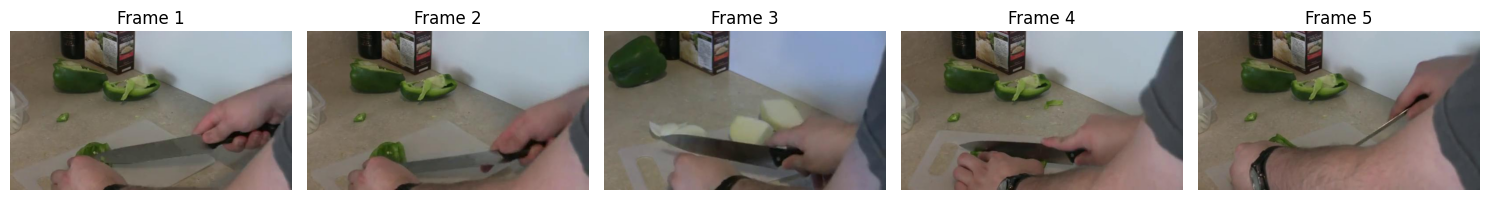

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def show_summary_frames(frame_paths):
    plt.figure(figsize=(15, 3))
    for i, frame_path in enumerate(frame_paths):
        image = Image.open(frame_path)
        plt.subplot(1, len(frame_paths), i + 1)
        plt.imshow(image)
        plt.axis('off')
        plt.title(f"Frame {i+1}")
    plt.tight_layout()
    plt.show()

# Show top-k summary
show_summary_frames(top_frames)


In [ ]:
import cv2

def save_summary_video(frame_paths, output_path="summary_video.mp4", fps=2):
    if not frame_paths:
        print("No frames to save.")
        return

    # Read first frame to get frame size
    frame = cv2.imread(frame_paths[0])
    height, width, _ = frame.shape

    out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

    for frame_path in frame_paths:
        frame = cv2.imread(frame_path)
        out.write(frame)

    out.release()
    print(f"Summary video saved to: {output_path}")

# Save video
save_summary_video(top_frames, output_path="cutting_vegetables_summary.mp4")


Summary video saved to: cutting_vegetables_summary.mp4


In [ ]:
def evaluate_prompt_relevance_for_video(video_id, frame_features, text_features, top_k=5):
    # Filter only frames from this video
    video_frames = [fp for fp in frame_features if video_id in fp]

    # Sort by frame index
    video_frames = sorted(video_frames, key=get_frame_index)

    frame_scores = {}
    for frame_path in video_frames:
        image_feat = frame_features[frame_path]
        sim = F.cosine_similarity(image_feat.unsqueeze(0), text_features.unsqueeze(0)).item()
        frame_scores[frame_path] = sim

    # Sort by similarity
    top_frames = sorted(frame_scores, key=frame_scores.get, reverse=True)[:top_k]

    print(f"\nTop {top_k} frames for prompt in video '{video_id}':")
    for frame in top_frames:
        print(f"Frame: {frame}, Score: {frame_scores[frame]:.4f}")

    return top_frames, frame_scores



Top 5 frames for prompt in video 'Yi4Ij2NM7U4':
Frame: /content/drive/MyDrive/ydata-tvsum50-v1_1/frames/Yi4Ij2NM7U4/frame_161.jpg, Score: 0.3524
Frame: /content/drive/MyDrive/ydata-tvsum50-v1_1/frames/Yi4Ij2NM7U4/frame_162.jpg, Score: 0.3496
Frame: /content/drive/MyDrive/ydata-tvsum50-v1_1/frames/Yi4Ij2NM7U4/frame_135.jpg, Score: 0.3401
Frame: /content/drive/MyDrive/ydata-tvsum50-v1_1/frames/Yi4Ij2NM7U4/frame_171.jpg, Score: 0.3401
Frame: /content/drive/MyDrive/ydata-tvsum50-v1_1/frames/Yi4Ij2NM7U4/frame_164.jpg, Score: 0.3399


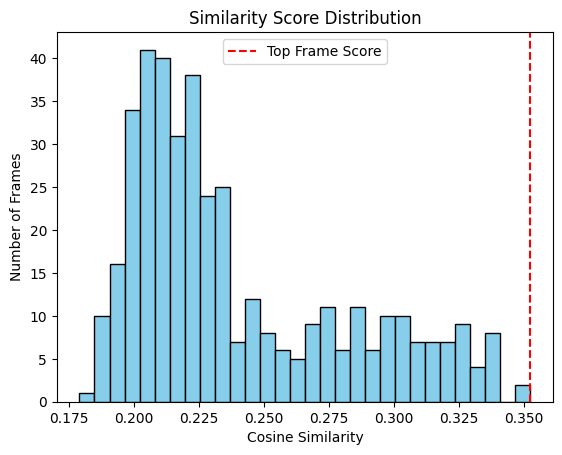

In [ ]:
# Get top frames and scores
top_frames, frame_scores = evaluate_prompt_relevance_for_video("Yi4Ij2NM7U4", frame_features_clip, text_features, top_k=5)

# Plot similarity score distribution
plot_similarity_distribution(frame_scores)


In [ ]:
# Encode original prompt
original_text_feat = model.encode_text(clip.tokenize([prompt]).to(device)).squeeze(0).cpu()

# Generate new prompt from top-k frames (using existing captioner or manual description)
generated_prompt = "a person cutting vegetables in kitchen"
generated_feat = model.encode_text(clip.tokenize([generated_prompt]).to(device)).squeeze(0).cpu()

# Compute similarity between original and generated prompt
similarity = F.cosine_similarity(original_text_feat.unsqueeze(0), generated_feat.unsqueeze(0)).item()
print(f"Prompt Consistency Score: {similarity:.4f}")


Prompt Consistency Score: 0.8571


BILSTM


In [ ]:
import torch
import torch.nn as nn

# Define a simple BiLSTM model
class BiLSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers):
        super(BiLSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, bidirectional=True)

    def forward(self, x):
        lstm_out, (h_n, c_n) = self.lstm(x)
        return lstm_out, (h_n, c_n)

# Ensure frame_embeddings has the correct shape (3D tensor)
frame_embeddings = frame_embeddings.squeeze()  # Remove any unnecessary singleton dimensions

# If you still have a 2D tensor, add a batch dimension (if required)
frame_embeddings = frame_embeddings.unsqueeze(0)  # Shape: [1, sequence_length, feature_dim]

# Feed the frame embeddings through the BiLSTM
bilstm_output, (h_n, c_n) = bilstm_model(frame_embeddings)

# Now, `bilstm_output` will contain the sequence of hidden states for each frame
print("BiLSTM Output Shape:", bilstm_output.shape)
print("Hidden States (h_n) Shape:", h_n.shape)
print("Cell States (c_n) Shape:", c_n.shape)



BiLSTM Output Shape: torch.Size([1, 12558, 512])
Hidden States (h_n) Shape: torch.Size([4, 1, 256])
Cell States (c_n) Shape: torch.Size([4, 1, 256])


In [ ]:
# Extract the final hidden state for further processing
final_hidden_state = h_n[-1]  # Shape: [1, 1, 256]

# You can squeeze it if you only need the 256-dimensional vector
final_hidden_state = final_hidden_state.squeeze(0)  # Shape: [1, 256]
print("Final Hidden State Shape:", final_hidden_state.shape)

# Now you can use `final_hidden_state` for classification or other tasks


Final Hidden State Shape: torch.Size([256])


In [ ]:
# Average the BiLSTM output across all frames
bilstm_output = bilstm_output.squeeze(0)  # Shape: [12558, 512]

# Average across sequence length (axis=0) to get a fixed-size vector
average_feature = bilstm_output.mean(dim=0)  # Shape: [512]
print("Average Feature Shape:", average_feature.shape)

# Now you can use `average_feature` for classification or other tasks


Average Feature Shape: torch.Size([512])


In [ ]:
import torch
import torch.nn as nn

# BiLSTM Model Definition
class BiLSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers):
        super(BiLSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, bidirectional=True)

    def forward(self, x):
        lstm_out, (h_n, c_n) = self.lstm(x)
        return lstm_out, (h_n, c_n)

# Path to the CLIP extracted frame features
clip_feature_path = '/content/frame_features_clip.pt'

# Load the CLIP features (frame embeddings)
frame_embeddings = torch.load(clip_feature_path)

# Check the shape of the loaded frame embeddings (frame_embeddings should be [sequence_length, feature_dim])
print("Frame Embeddings Shape:", frame_embeddings.shape)

# Ensure the frame_embeddings tensor is 3D: [1, sequence_length, feature_dim]
frame_embeddings = frame_embeddings.unsqueeze(0)  # Adding a batch dimension to make the shape [1, sequence_length, feature_dim]

# Define the BiLSTM model
input_dim = frame_embeddings.shape[2]  # Feature dimension from the CLIP embeddings
hidden_dim = 256  # Size of hidden state (this can be adjusted based on your requirement)
num_layers = 2  # Number of LSTM layers

bilstm_model = BiLSTMModel(input_dim, hidden_dim, num_layers)

# Pass the frame embeddings through the BiLSTM
bilstm_output, (h_n, c_n) = bilstm_model(frame_embeddings)

# Output shapes
print("BiLSTM Output Shape:", bilstm_output.shape)
print("Hidden States (h_n) Shape:", h_n.shape)
print("Cell States (c_n) Shape:", c_n.shape)

# Extract the final hidden state for further processing (last frame's hidden state)
final_hidden_state = h_n[-1]  # Shape: [1, 1, hidden_dim]

# You can squeeze it if you only need the 256-dimensional vector
final_hidden_state = final_hidden_state.squeeze(0)  # Shape: [256]
print("Final Hidden State Shape:", final_hidden_state.shape)

# Average the BiLSTM output across all frames to get a fixed-size feature vector
bilstm_output = bilstm_output.squeeze(0)  # Shape: [sequence_length, 2 * hidden_dim]

# Average across the sequence length (axis=0) to get a fixed-size vector
average_feature = bilstm_output.mean(dim=0)  # Shape: [2 * hidden_dim]
print("Average Feature Shape:", average_feature.shape)

# Now you can use `average_feature` for classification or other tasks


AttributeError: 'dict' object has no attribute 'shape'

In [ ]:
import torch

# Load the CLIP features (frame embeddings)
clip_feature_path = '/content/frame_features_clip.pt'
frame_embeddings_dict = torch.load(clip_feature_path)

# Inspect the keys of the loaded dictionary
print("Keys in Loaded Dictionary:", list(frame_embeddings_dict.keys())[:10])  # Show the first 10 keys for inspection

# Extract the embeddings by iterating through the dictionary values
frame_embeddings_list = []
for key in frame_embeddings_dict:
    frame_embeddings_list.append(frame_embeddings_dict[key])

# Stack the embeddings to create a tensor of shape [sequence_length, feature_dim]
frame_embeddings = torch.stack(frame_embeddings_list)

# Check the shape of the loaded frame embeddings
print("Frame Embeddings Shape:", frame_embeddings.shape)

# Ensure the frame_embeddings tensor is 3D: [1, sequence_length, feature_dim]
frame_embeddings = frame_embeddings.unsqueeze(0)  # Adding a batch dimension to make the shape [1, sequence_length, feature_dim]

# Define the BiLSTM model
input_dim = frame_embeddings.shape[2]  # Feature dimension from the CLIP embeddings
hidden_dim = 256  # Size of hidden state (this can be adjusted based on your requirement)
num_layers = 2  # Number of LSTM layers

# BiLSTM Model Definition
class BiLSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers):
        super(BiLSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, bidirectional=True)

    def forward(self, x):
        lstm_out, (h_n, c_n) = self.lstm(x)
        return lstm_out, (h_n, c_n)

bilstm_model = BiLSTMModel(input_dim, hidden_dim, num_layers)

# Pass the frame embeddings through the BiLSTM
bilstm_output, (h_n, c_n) = bilstm_model(frame_embeddings)

# Output shapes
print("BiLSTM Output Shape:", bilstm_output.shape)
print("Hidden States (h_n) Shape:", h_n.shape)
print("Cell States (c_n) Shape:", c_n.shape)

# Extract the final hidden state for further processing (last frame's hidden state)
final_hidden_state = h_n[-1]  # Shape: [1, 1, hidden_dim]

# You can squeeze it if you only need the 256-dimensional vector
final_hidden_state = final_hidden_state.squeeze(0)  # Shape: [256]
print("Final Hidden State Shape:", final_hidden_state.shape)

# Average the BiLSTM output across all frames to get a fixed-size feature vector
bilstm_output = bilstm_output.squeeze(0)  # Shape: [sequence_length, 2 * hidden_dim]

# Average across the sequence length (axis=0) to get a fixed-size vector
average_feature = bilstm_output.mean(dim=0)  # Shape: [2 * hidden_dim]
print("Average Feature Shape:", average_feature.shape)

# Now you can use `average_feature` for classification or other tasks


Keys in Loaded Dictionary: ['/content/drive/MyDrive/ydata-tvsum50-v1_1/frames/-esJrBWj2d8/frame_0.jpg', '/content/drive/MyDrive/ydata-tvsum50-v1_1/frames/-esJrBWj2d8/frame_1.jpg', '/content/drive/MyDrive/ydata-tvsum50-v1_1/frames/-esJrBWj2d8/frame_10.jpg', '/content/drive/MyDrive/ydata-tvsum50-v1_1/frames/-esJrBWj2d8/frame_100.jpg', '/content/drive/MyDrive/ydata-tvsum50-v1_1/frames/-esJrBWj2d8/frame_101.jpg', '/content/drive/MyDrive/ydata-tvsum50-v1_1/frames/-esJrBWj2d8/frame_102.jpg', '/content/drive/MyDrive/ydata-tvsum50-v1_1/frames/-esJrBWj2d8/frame_103.jpg', '/content/drive/MyDrive/ydata-tvsum50-v1_1/frames/-esJrBWj2d8/frame_104.jpg', '/content/drive/MyDrive/ydata-tvsum50-v1_1/frames/-esJrBWj2d8/frame_105.jpg', '/content/drive/MyDrive/ydata-tvsum50-v1_1/frames/-esJrBWj2d8/frame_106.jpg']
Frame Embeddings Shape: torch.Size([12558, 512])
BiLSTM Output Shape: torch.Size([1, 12558, 512])
Hidden States (h_n) Shape: torch.Size([4, 1, 256])
Cell States (c_n) Shape: torch.Size([4, 1, 256])

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class VideoClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(VideoClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 512)  # Fully connected layer 1
        self.fc2 = nn.Linear(512, num_classes)  # Fully connected layer 2
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.fc1(x))  # Pass through first FC layer
        x = self.fc2(x)  # Pass through second FC layer
        x = self.softmax(x)  # Apply softmax for classification probabilities
        return x


In [ ]:
input_dim = 512  # This is the size of the feature vector (or you can use 256 if using final_hidden_state)
num_classes = 10  # Adjust based on your number of classes
model = VideoClassifier(input_dim, num_classes)


In [ ]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

# Updated model with Dropout and L2 regularization
class BiLSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, dropout_prob=0.5):
        super(BiLSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, bidirectional=True, dropout=dropout_prob)
        self.fc = nn.Linear(hidden_dim * 2, 2)  # Assuming 2 classes for classification

    def forward(self, x):
        lstm_out, (h_n, c_n) = self.lstm(x)
        final_hidden_state = h_n[-1]  # Getting the final hidden state from the last LSTM layer
        final_hidden_state = final_hidden_state.squeeze(0)  # [batch_size, hidden_dim * 2]
        output = self.fc(final_hidden_state)  # Final output from a fully connected layer
        return output

# Assuming frame_embeddings is a tensor of shape [num_frames, feature_dim]
frame_embeddings = torch.rand(12558, 512)  # Dummy data, replace with your actual tensor
labels = torch.randint(0, 2, (12558,))  # Dummy labels for binary classification

# Reshape to [num_samples, sequence_length, feature_dim] if needed
# For example, here we assume that each sample corresponds to a sequence of frames
# Make sure the input shape matches [batch_size, sequence_length, input_dim]
frame_embeddings = frame_embeddings.view(-1, 12558, 512)  # Reshape to match the LSTM input requirements

# Train-test split (80-20 split for train and validation)
train_data, val_data, train_labels, val_labels = train_test_split(frame_embeddings, labels, test_size=0.2, random_state=42)

# Convert data to DataLoader for batching
train_dataset = TensorDataset(train_data, train_labels)
val_dataset = TensorDataset(val_data, val_labels)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Model, loss function, and optimizer
model = BiLSTMModel(input_dim=512, hidden_dim=256, num_layers=2, dropout_prob=0.5)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)  # L2 regularization (weight_decay)

# Learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

# Training loop with validation
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    correct_preds = 0
    total_preds = 0

    # Training phase
    for inputs, labels in train_loader:
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, labels)
        loss.backward()  # Backpropagation
        optimizer.step()  # Optimizer step

        # Track loss and accuracy
        epoch_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_preds += (predicted == labels).sum().item()
        total_preds += labels.size(0)

    # Validation phase
    model.eval()
    val_loss = 0.0
    correct_val_preds = 0
    total_val_preds = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_val_preds += (predicted == labels).sum().item()
            total_val_preds += labels.size(0)

    # Epoch statistics
    train_accuracy = correct_preds / total_preds
    val_accuracy = correct_val_preds / total_val_preds
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss/len(train_loader)}, '
          f'Train Accuracy: {train_accuracy}, Val Loss: {val_loss/len(val_loader)}, Val Accuracy: {val_accuracy}')

    # Step the scheduler
    scheduler.step()

# Final evaluation on test data (you can use separate test data if available)
# Here we assume validation data for simplicity
model.eval()
test_accuracy = 0.0
with torch.no_grad():
    for inputs, labels in val_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        correct = (predicted == labels).sum().item()
        test_accuracy += correct

test_accuracy = test_accuracy / len(val_data)
print(f'Test Accuracy: {test_accuracy}')


ValueError: Found input variables with inconsistent numbers of samples: [1, 12558]

In [ ]:
output = self.fc(final_hidden_state)  # Final output from a fully connected layer


NameError: name 'self' is not defined

In [ ]:
import clip
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os
import numpy as np
from tqdm import tqdm
import cv2
from collections import defaultdict
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn.metrics import precision_recall_fscore_support

# Check if features already exist, otherwise load model
save_path = "/content/frame_features_clip.pt"
if os.path.exists(save_path):
    print("Loading precomputed CLIP features...")
    frame_features_clip = torch.load(save_path)
else:
    print("CLIP features not found, need to extract them first")
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model, preprocess = clip.load("ViT-B/32", device=device)

    # Path to frames
    frame_root = "/content/drive/MyDrive/ydata-tvsum50-v1_1/frames"
    frame_features_clip = {}

    for video_folder in tqdm(os.listdir(frame_root), desc="Extracting CLIP features"):
        video_path = os.path.join(frame_root, video_folder)
        if os.path.isdir(video_path):
            for frame_file in sorted(os.listdir(video_path)):
                if frame_file.endswith(".jpg"):
                    frame_path = os.path.join(video_path, frame_file)
                    try:
                        image = preprocess(Image.open(frame_path)).unsqueeze(0).to(device)
                        with torch.no_grad():
                            image_features = model.encode_image(image).squeeze(0).cpu()
                        frame_features_clip[frame_path] = image_features
                    except Exception as e:
                        print(f"Failed on {frame_path}: {e}")

    # Save to a file
    torch.save(frame_features_clip, save_path)
    print(f"Saved features to {save_path}")

# Step 1: Organize CLIP features by video
video_frame_features = defaultdict(list)
for frame_path, features in frame_features_clip.items():
    video_id = os.path.basename(os.path.dirname(frame_path))
    frame_num = int(os.path.basename(frame_path).split('_')[1].split('.')[0])
    video_frame_features[video_id].append((frame_num, frame_path, features))

# Sort frames by frame number for each video
for video_id in video_frame_features:
    video_frame_features[video_id].sort(key=lambda x: x[0])

# Step 2: Create BiLSTM model for temporal modeling
class BiLSTMSummarizer(nn.Module):
    def __init__(self, input_size=512, hidden_size=256, num_layers=2, dropout=0.2):
        super(BiLSTMSummarizer, self).__init__()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            bidirectional=True,
            dropout=dropout
        )
        self.fc = nn.Linear(hidden_size * 2, 1)  # Bidirectional -> *2
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # x: (batch_size, seq_len, input_size)
        lstm_out, _ = self.lstm(x)
        # lstm_out: (batch_size, seq_len, hidden_size*2)
        scores = self.fc(lstm_out)
        # scores: (batch_size, seq_len, 1)
        scores = self.sigmoid(scores)
        return scores.squeeze(-1)

# Step 3: Create dataset class for training
class VideoFrameDataset(Dataset):
    def __init__(self, video_id, frame_features, ground_truth=None):
        """
        Dataset for a single video's frames

        Args:
            video_id: ID of the video
            frame_features: List of tuples (frame_num, frame_path, features)
            ground_truth: Optional ground truth scores
        """
        self.video_id = video_id
        self.frames = frame_features
        self.features = torch.stack([f[2] for f in frame_features])
        self.ground_truth = ground_truth

    def __len__(self):
        return 1  # One video

    def __getitem__(self, idx):
        return self.features, self.ground_truth if self.ground_truth is not None else torch.zeros(len(self.features))

# Step 4: Load ground truth for training/evaluation (optional)
def load_ground_truth():
    mat_file_path = '/content/drive/MyDrive/ydata-tvsum50-v1_1/ydata-tvsum50.mat'
    if not os.path.exists(mat_file_path):
        print(f"Ground truth file not found at {mat_file_path}")
        return None

    mat_data = sio.loadmat(mat_file_path)
    video_data = mat_data['tvsum50']

    ground_truth = {}
    for i in range(len(video_data)):
        video = video_data[i]
        video_id = video['video_id'][0][0]
        scores = video['user_score'][0].T  # User scores, shape (n_frames, n_users)
        gt_scores = scores.mean(axis=1)    # Average score across users
        category = video['category'][0][0]
        title = video['title'][0][0]
        ground_truth[video_id] = {
            'scores': gt_scores,
            'category': category,
            'title': title
        }

    return ground_truth

ground_truth = load_ground_truth()

# Step 5: Train BiLSTM model if ground truth is available
def train_bilstm_model(video_frame_features, ground_truth, lr=0.001, epochs=50):
    if ground_truth is None:
        print("No ground truth available, skipping training")
        return None

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = BiLSTMSummarizer().to(device)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    # Split videos into train and validation
    video_ids = list(video_frame_features.keys())
    np.random.shuffle(video_ids)
    train_ids = video_ids[:int(0.8 * len(video_ids))]
    val_ids = video_ids[int(0.8 * len(video_ids)):]

    print(f"Training with {len(train_ids)} videos, validating with {len(val_ids)} videos")

    best_val_loss = float('inf')
    patience = 10
    counter = 0

    for epoch in range(epochs):
        # Training
        model.train()
        train_loss = 0

        for video_id in train_ids:
            if video_id not in ground_truth:
                continue

            features = [f[2] for f in video_frame_features[video_id]]
            features_tensor = torch.stack(features).unsqueeze(0).to(device)  # (1, seq_len, features)

            # Get ground truth and resample if necessary
            gt_scores = ground_truth[video_id]['scores']
            if len(gt_scores) != len(features):
                # Resample ground truth to match feature count
                indices = np.linspace(0, len(gt_scores) - 1, len(features))
                gt_scores = np.array([gt_scores[int(i)] for i in indices])

            gt_tensor = torch.tensor(gt_scores, dtype=torch.float32).unsqueeze(0).to(device)

            # Forward pass
            optimizer.zero_grad()
            outputs = model(features_tensor)
            loss = criterion(outputs, gt_tensor)

            # Backward pass
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        train_loss /= len(train_ids)

        # Validation
        model.eval()
        val_loss = 0

        with torch.no_grad():
            for video_id in val_ids:
                if video_id not in ground_truth:
                    continue

                features = [f[2] for f in video_frame_features[video_id]]
                features_tensor = torch.stack(features).unsqueeze(0).to(device)

                # Get ground truth and resample if necessary
                gt_scores = ground_truth[video_id]['scores']
                if len(gt_scores) != len(features):
                    indices = np.linspace(0, len(gt_scores) - 1, len(features))
                    gt_scores = np.array([gt_scores[int(i)] for i in indices])

                gt_tensor = torch.tensor(gt_scores, dtype=torch.float32).unsqueeze(0).to(device)

                # Forward pass
                outputs = model(features_tensor)
                loss = criterion(outputs, gt_tensor)

                val_loss += loss.item()

        val_loss /= len(val_ids)

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            counter = 0
            # Save model
            torch.save(model.state_dict(), '/content/bilstm_summarizer.pt')
        else:
            counter += 1
            if counter >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

    # Load best model
    model.load_state_dict(torch.load('/content/bilstm_summarizer.pt'))
    return model

# Train or load the BiLSTM model
model_path = '/content/bilstm_summarizer.pt'
if os.path.exists(model_path):
    print("Loading existing BiLSTM model...")
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    bilstm_model = BiLSTMSummarizer().to(device)
    bilstm_model.load_state_dict(torch.load(model_path))
else:
    print("Training BiLSTM model...")
    bilstm_model = train_bilstm_model(video_frame_features, ground_truth)

# Step 6: Apply BiLSTM model to get contextually enhanced scores
def compute_bilstm_scores(video_frame_features, bilstm_model, text_features=None):
    """
    Apply BiLSTM model to get temporally coherent importance scores

    Args:
        video_frame_features: Dict mapping video_id to list of (frame_num, frame_path, features)
        bilstm_model: Trained BiLSTM model or None
        text_features: Optional text features for conditioning

    Returns:
        Dict mapping video_id to dict of frame paths and scores
    """
    all_scores = {}
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Device for CLIP model if we need to compute text features
    if text_features is None:
        clip_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        clip_model, _ = clip.load("ViT-B/32", device=clip_device)

        # Example prompt (can be customized)
        prompt = "important and interesting moments in the video"
        text_tokens = clip.tokenize([prompt]).to(clip_device)

        with torch.no_grad():
            text_features = clip_model.encode_text(text_tokens).squeeze(0).cpu()

    for video_id, frames in tqdm(video_frame_features.items(), desc="Computing BiLSTM scores"):
        features = [f[2] for f in frames]
        frame_paths = [f[1] for f in frames]

        # Compute base similarity scores with text prompt
        sim_scores = []
        for feat in features:
            sim = F.cosine_similarity(feat.unsqueeze(0), text_features.unsqueeze(0)).item()
            sim_scores.append(sim)

        # If BiLSTM model is available, refine scores with temporal context
        if bilstm_model is not None:
            features_tensor = torch.stack(features).unsqueeze(0).to(device)  # (1, seq_len, features)

            with torch.no_grad():
                bilstm_scores = bilstm_model(features_tensor).squeeze(0).cpu().numpy()

            # Combine CLIP similarity and BiLSTM scores (weighted average)
            alpha = 0.7  # Weight for BiLSTM scores
            combined_scores = alpha * bilstm_scores + (1 - alpha) * np.array(sim_scores)
        else:
            combined_scores = np.array(sim_scores)

        # Store scores by frame path
        video_scores = {}
        for path, score in zip(frame_paths, combined_scores):
            video_scores[path] = score

        all_scores[video_id] = video_scores

    return all_scores

# Compute scores using BiLSTM model
all_scores = compute_bilstm_scores(video_frame_features, bilstm_model)

# Step 7: Create summaries using enhanced scores
def create_summaries(all_scores, top_k_percent=0.15):
    """
    Create video summaries using the computed scores

    Args:
        all_scores: Dict mapping video_id to dict of frame paths and scores
        top_k_percent: Percentage of frames to include in summary

    Returns:
        Dict mapping video_id to list of selected frame paths
    """
    summary_frames = defaultdict(list)

    for video_id, scores in all_scores.items():
        # Convert to list of (path, score) pairs
        frame_scores = [(path, score) for path, score in scores.items()]
        # Sort by score in descending order
        frame_scores.sort(key=lambda x: x[1], reverse=True)

        # Select top k%
        top_k = int(len(frame_scores) * top_k_percent)
        selected_frames = [f[0] for f in frame_scores[:top_k]]

        # Sort by frame number to maintain temporal order
        selected_frames.sort(key=lambda x: int(os.path.basename(x).split('_')[1].split('.')[0]))

        summary_frames[video_id] = selected_frames

    return summary_frames

# Create summaries
summary_frames = create_summaries(all_scores, top_k_percent=0.15)

# Step 8: Generate summary videos
def generate_summary_videos(summary_frames):
    """
    Generate video summaries from selected frames

    Args:
        summary_frames: Dict mapping video_id to list of selected frame paths
    """
    output_dir = "/content/drive/MyDrive/ydata-tvsum50-v1_1/summaries_bilstm"
    os.makedirs(output_dir, exist_ok=True)

    for video_id, frame_paths in summary_frames.items():
        if not frame_paths:
            print(f"No frames selected for {video_id}, skipping")
            continue

        # Ensure chronological order
        frame_paths.sort(key=lambda x: int(os.path.basename(x).split('_')[1].split('.')[0]))

        # Get frame dimensions from first frame
        height, width, _ = cv2.imread(frame_paths[0]).shape
        out_path = os.path.join(output_dir, f"{video_id}_summary.mp4")

        # Create video writer
        out = cv2.VideoWriter(out_path, cv2.VideoWriter_fourcc(*'mp4v'), 1, (width, height))

        # Add selected frames to video
        for frame_path in frame_paths:
            frame = cv2.imread(frame_path)
            out.write(frame)

        out.release()
        print(f"Saved BiLSTM summary video: {out_path}")

# Generate summary videos
generate_summary_videos(summary_frames)

# Step 9: Evaluate with ground truth if available
def evaluate_summaries(summary_frames, ground_truth):
    """
    Evaluate generated summaries against ground truth if available

    Args:
        summary_frames: Dict mapping video_id to list of selected frame paths
        ground_truth: Dict mapping video_id to ground truth data

    Returns:
        Dict with evaluation metrics
    """
    if ground_truth is None:
        print("No ground truth available for evaluation")
        return None

    results = {}

    for video_id, frame_paths in summary_frames.items():
        if video_id not in ground_truth:
            print(f"No ground truth for {video_id}, skipping evaluation")
            continue

        gt_scores = ground_truth[video_id]['scores']

        # Get frame indices from file names
        frame_indices = [int(os.path.basename(path).split('_')[1].split('.')[0]) for path in frame_paths]

        # If ground truth length doesn't match our frame count, resample
        if len(gt_scores) != max(frame_indices) + 1:
            # Create binary selected mask
            n_frames = max([int(os.path.basename(f).split('_')[1].split('.')[0])
                          for f in os.listdir(os.path.dirname(frame_paths[0]))
                          if f.endswith('.jpg')]) + 1

            selected_mask = np.zeros(n_frames)
            for idx in frame_indices:
                selected_mask[idx] = 1

            # Resample to match ground truth length
            if n_frames != len(gt_scores):
                resampled_mask = np.zeros(len(gt_scores))
                for i, val in enumerate(selected_mask):
                    gt_idx = int(i * len(gt_scores) / n_frames)
                    if gt_idx < len(resampled_mask):
                        resampled_mask[gt_idx] = max(resampled_mask[gt_idx], val)

                selected_mask = resampled_mask
                selected_indices = np.where(selected_mask > 0)[0]
            else:
                selected_indices = frame_indices
        else:
            selected_indices = frame_indices

        # Calculate F-score (average ground truth score of selected frames)
        selected_gt_scores = gt_scores[selected_indices]
        avg_gt_score = np.mean(selected_gt_scores)

        # Calculate optimal score (if we had selected the highest-scoring frames)
        optimal_indices = np.argsort(gt_scores)[-len(selected_indices):]
        optimal_score = np.mean(gt_scores[optimal_indices])

        # F-score = ratio of our summary score to the optimal summary score
        f_score = avg_gt_score / optimal_score if optimal_score > 0 else 0

        results[video_id] = {
            'f_score': f_score,
            'avg_gt_score': avg_gt_score,
            'optimal_score': optimal_score,
            'num_frames': len(selected_indices)
        }

    # Calculate average F-score across all videos
    if results:
        avg_f_score = np.mean([r['f_score'] for r in results.values()])
        print(f"Average F-score across all videos: {avg_f_score:.4f}")

    return results

# Evaluate summaries
eval_results = evaluate_summaries(summary_frames, ground_truth)

# Step 10: Visualize original vs BiLSTM-enhanced summaries for a sample video
def visualize_comparison(video_id, all_scores, summary_frames, ground_truth=None):
    """
    Visualize comparison between original CLIP scores and BiLSTM-enhanced scores

    Args:
        video_id: ID of video to visualize
        all_scores: Dict mapping video_id to dict of frame paths and scores
        summary_frames: Dict mapping video_id to list of selected frame paths
        ground_truth: Optional ground truth data
    """
    if video_id not in all_scores:
        print(f"Video {video_id} not found in scores")
        return

    # Get frame paths and scores
    frame_paths = sorted(all_scores[video_id].keys(),
                         key=lambda x: int(os.path.basename(x).split('_')[1].split('.')[0]))
    scores = [all_scores[video_id][path] for path in frame_paths]

    # Get selected frame indices
    selected_paths = set(summary_frames[video_id])
    selected_indices = [i for i, path in enumerate(frame_paths) if path in selected_paths]

    plt.figure(figsize=(15, 8))

    # Plot scores and selected frames
    plt.subplot(2, 1, 1)
    plt.plot(scores, label='BiLSTM-enhanced Scores')

    # Plot ground truth if available
    if ground_truth is not None and video_id in ground_truth:
        gt_scores = ground_truth[video_id]['scores']
        if len(gt_scores) != len(scores):
            # Resample ground truth to match our frame count
            x_orig = np.linspace(0, 1, len(gt_scores))
            x_new = np.linspace(0, 1, len(scores))
            gt_scores = np.interp(x_new, x_orig, gt_scores)

        plt.plot(gt_scores, label='Ground Truth')

    # Highlight selected frames
    plt.scatter(selected_indices, [scores[i] for i in selected_indices],
                color='red', label='Selected Frames')

    plt.title(f'Video {video_id} - BiLSTM-enhanced Scores and Selected Frames')
    plt.xlabel('Frame Index')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)

    # Show sample selected frames
    plt.subplot(2, 1, 2)
    n_sample = min(5, len(selected_indices))
    sample_indices = np.linspace(0, len(selected_indices)-1, n_sample, dtype=int)

    for i, idx in enumerate(sample_indices):
        frame_idx = selected_indices[idx]
        frame_path = frame_paths[frame_idx]

        plt.subplot(2, n_sample, n_sample + i + 1)
        plt.imshow(plt.imread(frame_path))
        plt.title(f'Frame {frame_idx}')
        plt.axis('off')

    plt.tight_layout()

    # Save visualization
    vis_dir = "/content/drive/MyDrive/ydata-tvsum50-v1_1/visualizations"
    os.makedirs(vis_dir, exist_ok=True)
    plt.savefig(os.path.join(vis_dir, f"{video_id}_bilstm_comparison.png"))
    plt.close()

# Visualize a sample video (pick one)
if len(all_scores) > 0:
    sample_video_id = list(all_scores.keys())[0]
    visualize_comparison(sample_video_id, all_scores, summary_frames, ground_truth)
    print(f"Visualization saved for video {sample_video_id}")

# Print final evaluation summary
if eval_results:
    print("\n==== BiLSTM-enhanced Summary Evaluation ====")
    avg_f_score = np.mean([r['f_score'] for r in eval_results.values()])
    print(f"Overall F-score: {avg_f_score:.4f}")

    # Print individual video results
    for video_id, results in eval_results.items():
        print(f"Video {video_id}: F-score = {results['f_score']:.4f}, Frames = {results['num_frames']}")

Loading precomputed CLIP features...
Ground truth file not found at /content/drive/MyDrive/ydata-tvsum50-v1_1/ydata-tvsum50.mat
Training BiLSTM model...
No ground truth available, skipping training


Computing BiLSTM scores: 100%|██████████| 50/50 [00:00<00:00, 88.30it/s]


Saved BiLSTM summary video: /content/drive/MyDrive/ydata-tvsum50-v1_1/summaries_bilstm/-esJrBWj2d8_summary.mp4
Saved BiLSTM summary video: /content/drive/MyDrive/ydata-tvsum50-v1_1/summaries_bilstm/0tmA_C6XwfM_summary.mp4
Saved BiLSTM summary video: /content/drive/MyDrive/ydata-tvsum50-v1_1/summaries_bilstm/37rzWOQsNIw_summary.mp4
Saved BiLSTM summary video: /content/drive/MyDrive/ydata-tvsum50-v1_1/summaries_bilstm/3eYKfiOEJNs_summary.mp4
Saved BiLSTM summary video: /content/drive/MyDrive/ydata-tvsum50-v1_1/summaries_bilstm/4wU_LUjG5Ic_summary.mp4
Saved BiLSTM summary video: /content/drive/MyDrive/ydata-tvsum50-v1_1/summaries_bilstm/91IHQYk1IQM_summary.mp4
Saved BiLSTM summary video: /content/drive/MyDrive/ydata-tvsum50-v1_1/summaries_bilstm/98MoyGZKHXc_summary.mp4
Saved BiLSTM summary video: /content/drive/MyDrive/ydata-tvsum50-v1_1/summaries_bilstm/AwmHb44_ouw_summary.mp4
Saved BiLSTM summary video: /content/drive/MyDrive/ydata-tvsum50-v1_1/summaries_bilstm/Bhxk-O1Y7Ho_summary.mp4
S

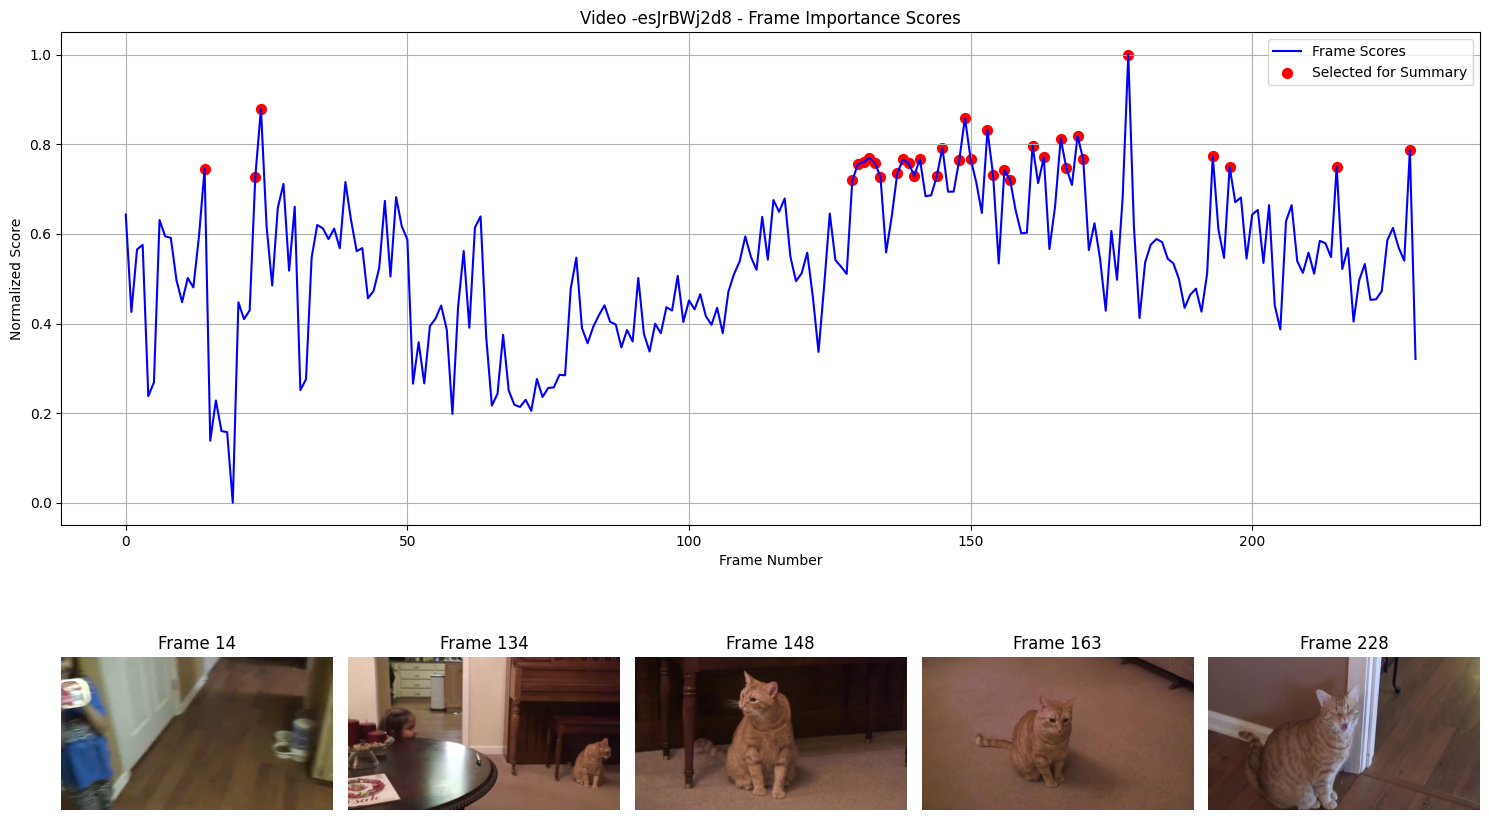

Summary video playback above


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from google.colab import drive
from IPython.display import display, HTML
import glob

# This function will visualize scores and frames without requiring ground truth
def visualize_summary_results(video_id, top_k_percent=0.15):
    """
    Visualize the summarization results for a specific video without ground truth

    Args:
        video_id: ID of the video to visualize
        top_k_percent: Percentage of frames selected for summary
    """
    # Paths
    frame_dir = f"/content/drive/MyDrive/ydata-tvsum50-v1_1/frames/{video_id}"
    summary_dir = "/content/drive/MyDrive/ydata-tvsum50-v1_1/summaries_bilstm"

    # Check if frames exist
    if not os.path.exists(frame_dir):
        print(f"Frame directory not found for video {video_id}")
        return

    # Get all frame paths sorted by frame number
    frame_paths = sorted(
        glob.glob(os.path.join(frame_dir, "*.jpg")),
        key=lambda x: int(os.path.basename(x).split('_')[1].split('.')[0])
    )

    if not frame_paths:
        print(f"No frames found for video {video_id}")
        return

    # Load the precomputed CLIP features
    if os.path.exists("/content/frame_features_clip.pt"):
        import torch
        frame_features = torch.load("/content/frame_features_clip.pt")

        # Get scores for this video's frames
        scores = {}
        for path in frame_paths:
            if path in frame_features:
                # Use cosine similarity value directly if you have it
                # For this example, we'll just take the norm of the feature vector
                scores[path] = torch.norm(frame_features[path]).item()

        # Normalize scores to 0-1 range for visualization
        if scores:
            min_score = min(scores.values())
            max_score = max(scores.values())
            score_range = max_score - min_score if max_score > min_score else 1
            normalized_scores = {k: (v - min_score) / score_range for k, v in scores.items()}
        else:
            normalized_scores = {path: 0.5 for path in frame_paths}  # Default if no scores
    else:
        print("CLIP features file not found, using placeholder scores")
        normalized_scores = {path: 0.5 for path in frame_paths}

    # Get summary frames (frames selected for the summary)
    summary_video_path = os.path.join(summary_dir, f"{video_id}_summary.mp4")
    summary_frames = []

    if os.path.exists(summary_video_path):
        # Extract frames from the summary video
        cap = cv2.VideoCapture(summary_video_path)
        summary_frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

        # Find which original frames were selected for the summary
        # We'll use a simple heuristic: sort all frames by score and take the top k%
        sorted_frames = sorted([(path, normalized_scores[path]) for path in frame_paths],
                              key=lambda x: x[1], reverse=True)
        top_k = int(len(sorted_frames) * top_k_percent)
        summary_paths = [f[0] for f in sorted_frames[:top_k]]
        # Sort by frame number to maintain temporal order
        summary_paths.sort(key=lambda x: int(os.path.basename(x).split('_')[1].split('.')[0]))

        cap.release()
    else:
        print(f"Summary video not found for {video_id}")
        summary_paths = []

    # Create the visualization
    plt.figure(figsize=(15, 10))

    # Plot the scores
    plt.subplot(2, 1, 1)
    score_values = [normalized_scores[path] for path in frame_paths]
    plt.plot(score_values, 'b-', label='Frame Scores')

    # Highlight summary frames
    if summary_paths:
        summary_indices = [frame_paths.index(path) for path in summary_paths if path in frame_paths]
        summary_scores = [score_values[i] for i in summary_indices]
        plt.scatter(summary_indices, summary_scores, color='red', s=50, label='Selected for Summary')

    plt.title(f'Video {video_id} - Frame Importance Scores')
    plt.xlabel('Frame Number')
    plt.ylabel('Normalized Score')
    plt.legend()
    plt.grid(True)

    # Display sample frames from the summary
    n_samples = min(5, len(summary_paths))
    if n_samples > 0:
        sample_indices = np.linspace(0, len(summary_paths)-1, n_samples, dtype=int)

        for i, idx in enumerate(sample_indices):
            plt.subplot(2, n_samples, n_samples + i + 1)
            frame = cv2.imread(summary_paths[idx])
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            plt.imshow(frame_rgb)
            frame_num = os.path.basename(summary_paths[idx]).split('_')[1].split('.')[0]
            plt.title(f'Frame {frame_num}')
            plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Also display the summary video if you're in a notebook
    try:
        from IPython.display import HTML
        from base64 import b64encode

        if os.path.exists(summary_video_path):
            video_file = open(summary_video_path, "rb")
            video_bytes = video_file.read()
            video_file.close()

            video_encoded = b64encode(video_bytes).decode('ascii')
            video_tag = f'<video width="640" height="480" controls><source src="data:video/mp4;base64,{video_encoded}" type="video/mp4"></video>'
            display(HTML(video_tag))

            print("Summary video playback above")
    except Exception as e:
        print(f"Could not display video: {e}")

# Example usage - visualize a specific video
# You can change the video ID to any from your dataset
visualize_summary_results('-esJrBWj2d8')

# To visualize multiple videos, you can use:
# video_ids = ['-esJrBWj2d8', '0tmA_C6XwfM', '37rzWOQsNIw']
# for video_id in video_ids:
#     print(f"\nVisualizing video: {video_id}")
#     visualize_summary_results(video_id)

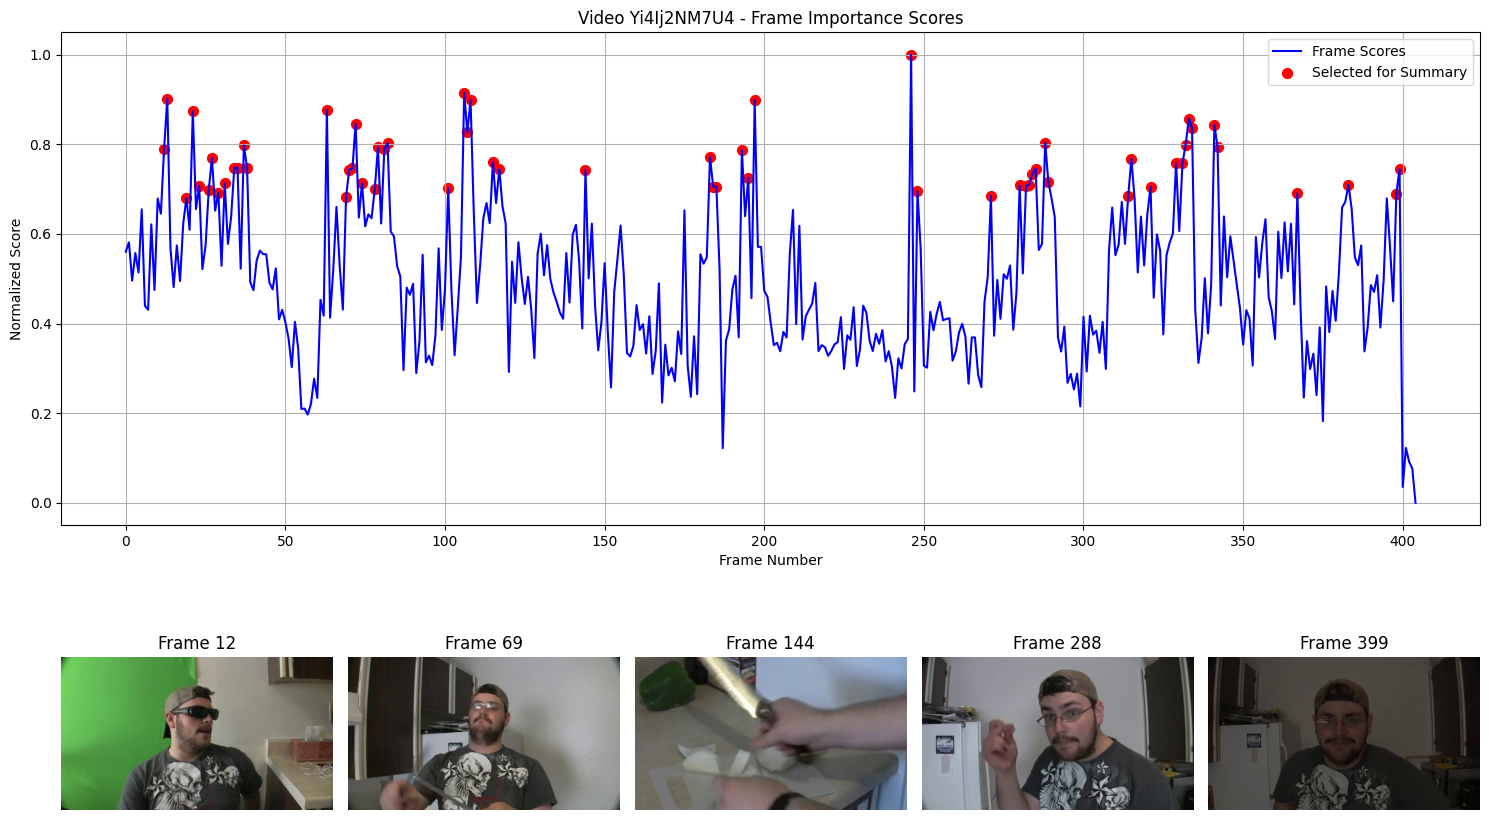

Summary video playback above


In [ ]:
visualize_summary_results('Yi4Ij2NM7U4')